# Libraries

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.Network import *
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(25,15)})

# Data Cleaning

In [5]:
df = pd.read_csv(r"../data/processed/UserProcessed.csv")
df.head()

,UserId,UserName,DisplayName,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_2Y,Flg_Creacion_2Y_3Y,Flg_Creacion_3Y_4Y,Flg_Creacion_4Y_5Y,Flg_Creacion_5Y
0,368,antgoldbloom,Anthony Goldbloom,0.333333,0.002177,0.058373,0.002177,0.001536,0.030075,0.030075,1.340541e-25,0.056779,0.056779,0.003174,0.000000,0.000000,0.0,0.0,0.057692,0.034759,0.03211,0.023214,0.016508,0.090909,0.130435,0.064516,1,1,1,0,0,0,0,0,1
1,381,iguyon,Isabelle,0.333333,0.000000,0.000356,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.007233,0.007233,0.000138,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.001786,0.006295,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,0.000000,0.000119,0.000000,0.001529,0.007519,0.007519,1.661548e-26,0.003777,0.003777,0.000088,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000119,0.000000,0.000000,0.000000,1,1,1,0,0,0,0,0,1
3,392,jmeynet,Julien Meynet,0.666667,0.000000,0.000059,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.001600,0.001600,0.000003,0.016667,0.118644,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000238,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
4,394,m4xl1n,m4xl1n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.016667,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1


In [6]:
df.drop(columns=["UserId","UserName","DisplayName"],inplace=True)
df.head()

,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_2Y,Flg_Creacion_2Y_3Y,Flg_Creacion_3Y_4Y,Flg_Creacion_4Y_5Y,Flg_Creacion_5Y
0,0.333333,0.002177,0.058373,0.002177,0.001536,0.030075,0.030075,1.340541e-25,0.056779,0.056779,0.003174,0.000000,0.000000,0.0,0.0,0.057692,0.034759,0.03211,0.023214,0.016508,0.090909,0.130435,0.064516,1,1,1,0,0,0,0,0,1
1,0.333333,0.000000,0.000356,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.007233,0.007233,0.000138,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.001786,0.006295,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
2,0.000000,0.000000,0.000119,0.000000,0.001529,0.007519,0.007519,1.661548e-26,0.003777,0.003777,0.000088,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000119,0.000000,0.000000,0.000000,1,1,1,0,0,0,0,0,1
3,0.666667,0.000000,0.000059,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.001600,0.001600,0.000003,0.016667,0.118644,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000238,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.016667,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1


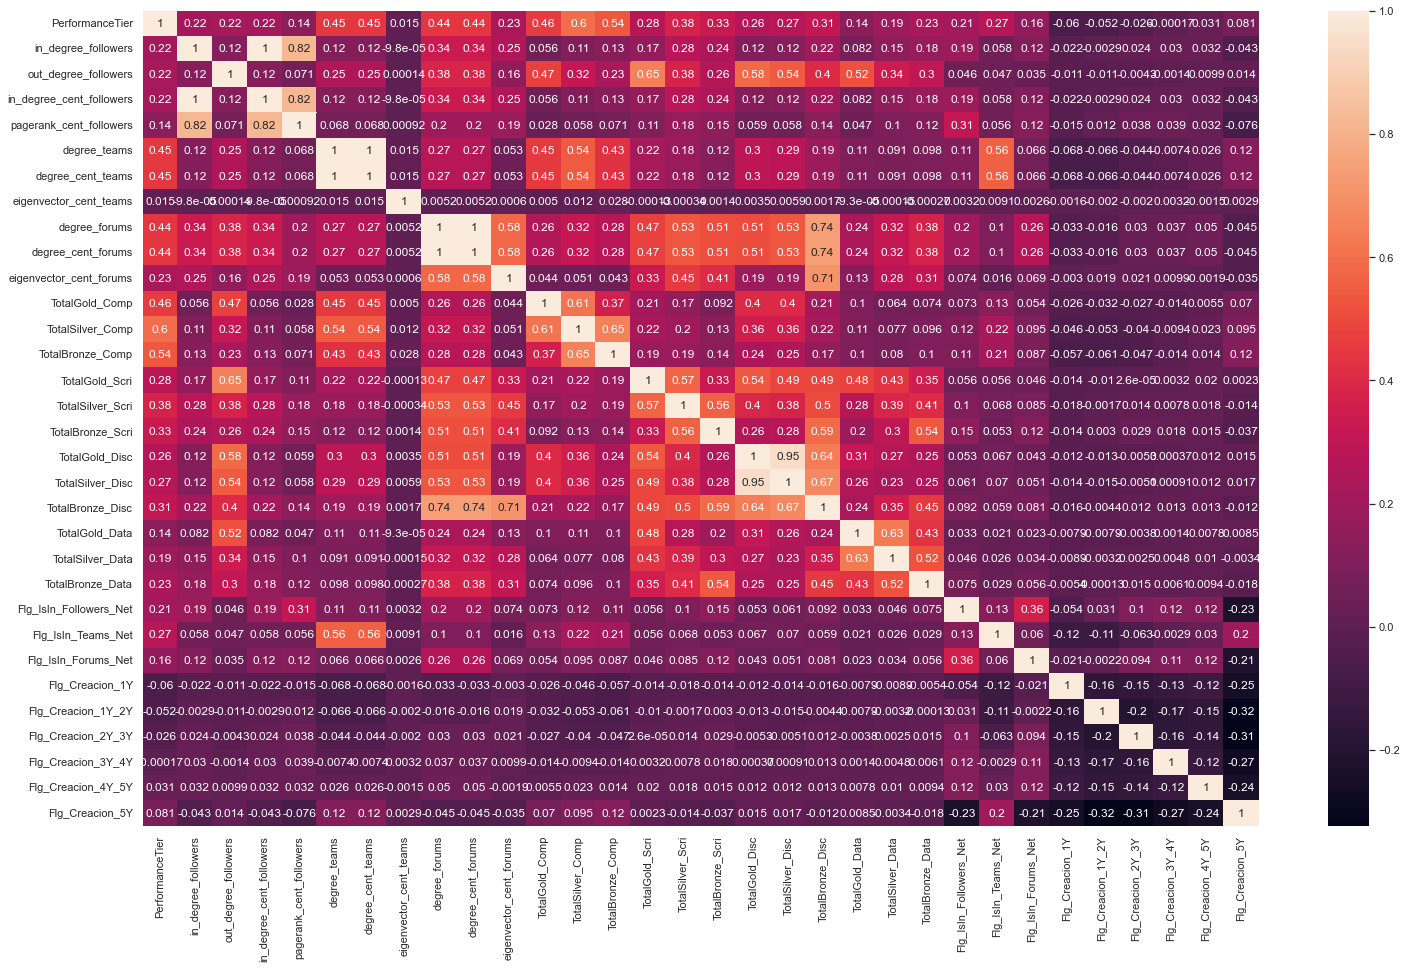

In [13]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
inertia = []
sil = []
for k in range(2,11):
    algo = KMeans(n_clusters=k,random_state = 66)
    algo.fit(scaler_X)
    #inertia
    inertia.append(algo.inertia_)

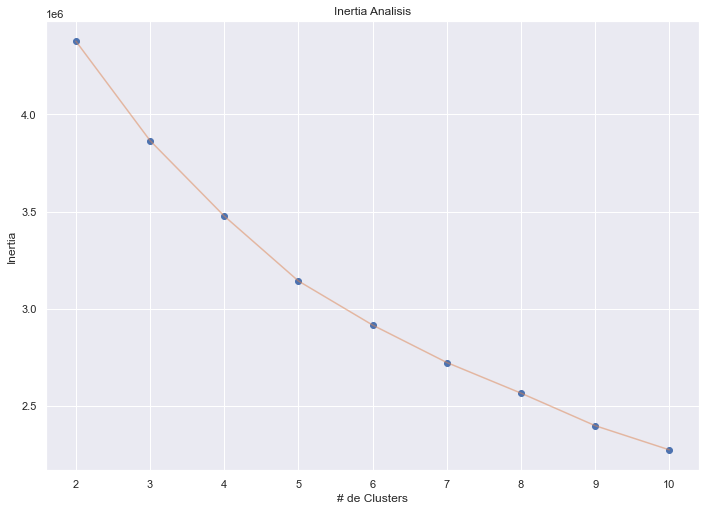

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title("Inertia Analisis")
plt.xlabel("# de Clusters")
plt.ylabel("Inertia")

plt.plot(np.arange(2,11), inertia, 'o')
plt.plot(np.arange(2,11), inertia, '-', alpha=0.5)

plt.show()

In [12]:
# define dataset
model = KMeans(n_clusters=5)
model.fit(scaler_X)

KMeans(n_clusters=5)

In [14]:
df_2["cluster"] = model.predict(scaler_X)

In [15]:
df_2["cluster"].value_counts()

1    77208
4    76196
0    36005
3     4643
2       95
Name: cluster, dtype: int64

In [17]:
df_2.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,CTDCOMP,CTDCOMP_DS,CTDCOMP_Supervizado,CTDCOMP_NoSupervizado,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,cluster
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,6.0,6.0,0.003895,0.000003,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207,101.0,63.0,44.0,62.0,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,3
1,381,iguyon,Isabelle,2,5Y,0.0,0.0,0.000024,0.000003,-1.0,-1.000000,-1.000000e+00,113.0,0.001116,0.000052,64.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1
2,389,anandjeyahar,Anand Jeyahar,1,5Y,0.0,0.0,0.000008,0.000003,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033,17.0,13.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,392,jmeynet,Julien Meynet,3,5Y,0.0,0.0,0.000004,0.000003,-1.0,-1.000000,-1.000000e+00,25.0,0.000247,0.000001,10.0,1.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1
4,394,m4xl1n,m4xl1n,1,5Y,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000e+00,-1.0,-1.000000,-1.000000,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
